In [1]:
#Course: Artificial Intelligence
#Assignment No: 04
#Section: BCS-A

# Group Members
# Moiz Ahmed (FA21-BCS-030)
# M. Abdullah (FA21-BCS-135)
# M. Azeem Azam (FA21-BCS-048)

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

In [28]:
train_data_path = 'train.csv'
test_data_path = 'test.csv'

train_data = pd.read_csv(train_data_path, low_memory=False)
test_data = pd.read_csv(test_data_path, low_memory=False)

In [29]:
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

In [30]:
target_column = 'Credit_Score'
features = train_data.columns.drop(target_column)

X_train = train_data[features]
y_train = train_data[target_column]
X_test = test_data[features]

In [31]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

In [32]:
for col in numerical_cols:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11800\3541504300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = pd.to_numeric(X_train[col], errors='coerce')


In [33]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [34]:
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [36]:
# Function training and visualizing models
def train_and_visualize(model, model_name, X_train, y_train, X_test, label_encoder):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fitting the model on training data
    pipeline.fit(X_train, y_train)
    
    # Making predictions
    y_pred_encoded = pipeline.predict(X_test)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    
    # Saving predictions to CSV file
    results = pd.DataFrame({'Predictions': y_pred})
    results.to_csv(f'{model_name}_outputs.csv', index=False)
    
    # Visualizing predictions using a bar chart
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y_pred)
    plt.title(f'{model_name}: Distribution of Predicted Credit Scores')
    plt.xlabel('Credit Score')
    plt.ylabel('Frequency')
    plt.show()

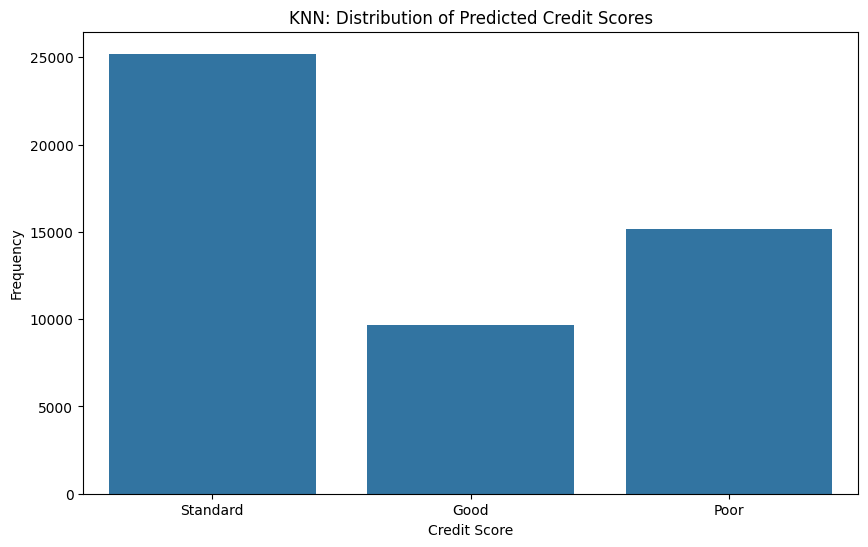

In [13]:
# K-Nearest Neighbors
train_and_visualize(KNeighborsClassifier(), 'KNN', X_train, y_train_encoded, X_test, label_encoder)

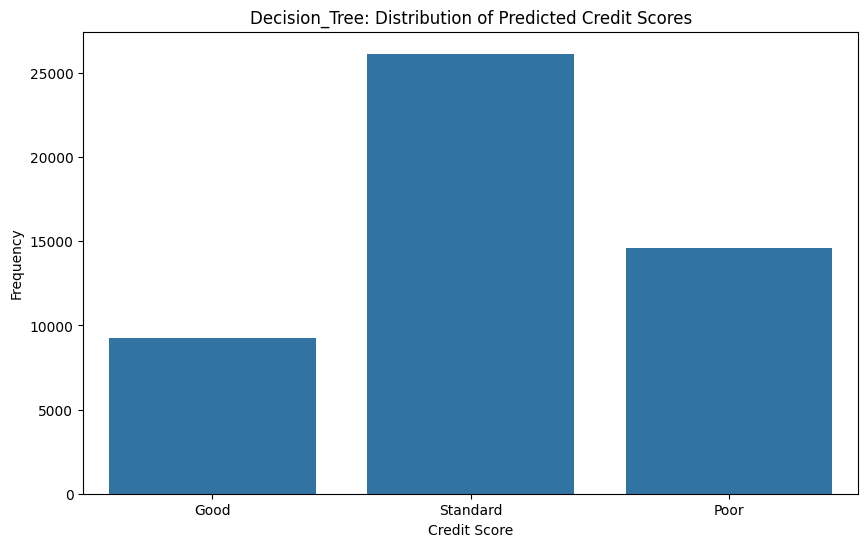

In [14]:
# Decision Tree
train_and_visualize(DecisionTreeClassifier(), 'Decision_Tree', X_train, y_train_encoded, X_test, label_encoder)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


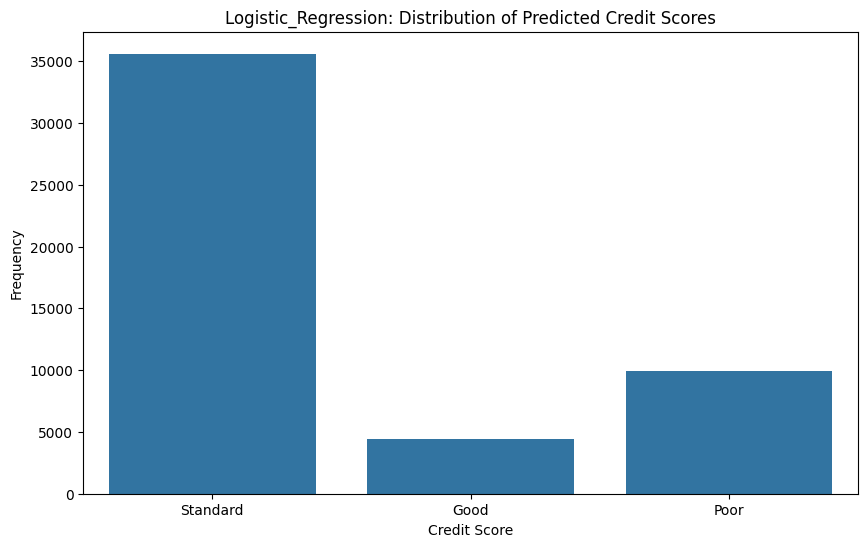

In [12]:
# Logistic Regression
train_and_visualize(LogisticRegression(max_iter=2000), 'Logistic_Regression', X_train, y_train_encoded, X_test, label_encoder)